In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Perturbation Simulation

Simulation of single-cell RNA sequencing datasets and datasets of perturbation of their cells.

## Telegraph model of gene expression

The gene switches between on and off states, transcribing molcules of X when on which then degrade:

$ G_{off} \underset{k_{off}}{\stackrel{k_{on}}{\rightleftharpoons}} G_{on} $

$ G_{on} \stackrel{k_{tx}}\longrightarrow G_{on} + X $

$ X \stackrel{k_{deg}}\longrightarrow \varnothing $

However, we only observe the number of molecules of X, not the state of the gene, giving "mariginal observations" from $\bar{p}(x)$ and not $p(x,0)$ or $p(x,1)$ over the state space $ (x,g) \in \mathbb{N} \times \{0,1\} $ where g = 0 corresponds to $ G_{off} $ and g = 1 to $ G_{on} $

The stationary distribution (marginal) of the telegraph model is Beta-Poisson, which can be used to simulate data:

$ x \vert \rho \sim \text{Poisson}\left(\frac{k_{tx}}{k_{deg}}\rho\right) \quad \rho \sim \text{Beta}\left(\frac{k_{on}}{k_{deg}}, \frac{k_{off}}{k_{deg}}\right)$

## Simulation

In [142]:
rng = np.random.default_rng(77)

k_on = 0.5623899643810538
k_off = 0.49338191417152033
k_tx = 1.020534183106201
k_deg = 1.0

k_on, k_tx UP by 2.3437035524750263

k_on = 1.3180753573961794
k_off = 0.49338191417152033
k_tx = 2.391829590368202
k_deg = 1.0



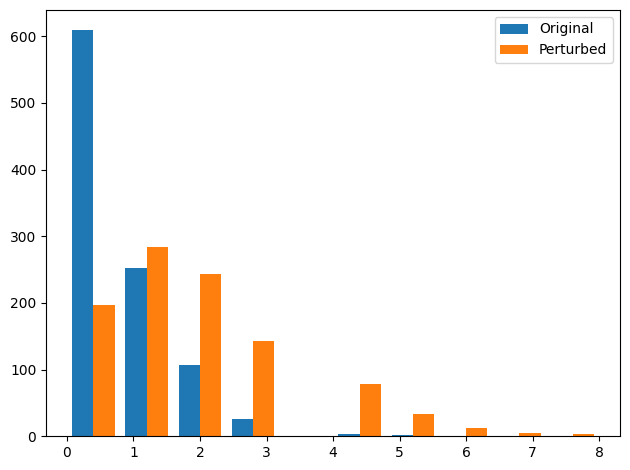

In [139]:
# sample parameter values
k_on = 10 ** rng.uniform(-1, 1)
k_off = 10 ** rng.uniform(-1, 1)
k_tx = 10 ** rng.uniform(-1, 1)
k_deg = 1.0
print(f"k_on = {k_on}\nk_off = {k_off}\nk_tx = {k_tx}\nk_deg = {k_deg}\n")

# sample from stationary dist p(x)
rho = rng.beta(k_on / k_deg, k_off / k_deg, size=1000)
x = rng.poisson(rho * k_tx / k_deg, size=1000)

# ignore capture efficiency

# sample from perturbation options
pert = rng.integers(3)
match pert:
    # up
    case 0:
        mult = rng.uniform(1.5, 5)
        choice = rng.integers(7)
        match choice:
            case 0:
                print(f"k_on UP by {mult}\n")
                k_on *= mult
            case 1:
                print(f"k_off DOWN by {mult}\n")
                k_off /= mult
            case 3:
                print(f"k_tx UP by {mult}\n")
                k_tx *= mult
            case 4:
                print(f"k_on UP, k_off DOWN by {mult}\n")
                k_on *= mult
                k_off /= mult
            case 5:
                print(f"k_on, k_tx UP by {mult}\n")
                k_on *= mult
                k_tx *= mult
            case 6:
                print(f"k_tx UP, k_deg DOWN by {mult}\n")
                k_off /= mult
                k_tx *= mult
            case 7:
                print(f"k_on, k_tx UP, k_off DOWN by {mult}\n")
                k_on *= mult
                k_off /= mult
                k_tx *= mult

    # none
    case 1:
        print("NO sig. perturbation\n")
        sig = 0.1
        k_on = max(rng.normal(k_on, sig), 0.1)
        k_off = max(rng.normal(k_off, sig), 0.1)
        k_tx = max(rng.normal(k_tx, sig), 0.1)

    # down
    case 2:
        mult = rng.uniform(1.5, 5)
        choice = rng.integers(7)
        match choice:
            case 0:
                print(f"k_on DOWN by {mult}\n")
                k_on /= mult
            case 1:
                print(f"k_off UP by {mult}\n")
                k_off *= mult
            case 3:
                print(f"k_tx DOWN by {mult}\n")
                k_tx /= mult
            case 4:
                print(f"k_off UP, k_on DOWN by {mult}\n")
                k_on /= mult
                k_off *= mult
            case 5:
                print(f"k_on, k_tx DOWN by {mult}\n")
                k_on /= mult
                k_tx /= mult
            case 6:
                print(f"k_off UP, k_tx DOWN by {mult}\n")
                k_off *= mult
                k_tx /= mult
            case 7:
                print(f"k_off UP, k_on, k_tx DOWN by {mult}\n")
                k_on /= mult
                k_off *= mult
                k_tx /= mult

print(f"k_on = {k_on}\nk_off = {k_off}\nk_tx = {k_tx}\nk_deg = {k_deg}\n")

# sample from stationary dist p(x)
rho = rng.beta(k_on / k_deg, k_off / k_deg, size=1000)
x_pert = rng.poisson(rho * k_tx / k_deg, size=1000)

# ignore capture efficiency

plt.hist([x, x_pert], label=["Original", "Perturbed"]);
#plt.hist(x, alpha=0.5, label="Original");
#plt.hist(x_pert, alpha=0.5, label="Perturbed");
plt.legend()
plt.tight_layout()
plt.show()

In [156]:
# dataframes
parameters_original = pd.DataFrame(columns=['k_on', 'k_off', 'k_tx', 'k_deg'])
parameters_perturbed = pd.DataFrame(columns=['k_on', 'k_off', 'k_tx', 'k_deg'])
counts_original = pd.DataFrame()
counts_perturbed = pd.DataFrame()

In [157]:
# for each gene
for i in range(10):
    # sample parameters 
    k_on = 10 ** rng.uniform(-1, 1)
    k_off = 10 ** rng.uniform(-1, 1)
    k_tx = 10 ** rng.uniform(-1, 1)
    k_deg = 1.0
    parameters_original.loc[i] = [k_on, k_off, k_tx, k_deg]

    # sample from stationary dist p(x)
    rho = rng.beta(k_on / k_deg, k_off / k_deg, size=1000)
    x = rng.poisson(rho * k_tx / k_deg, size=1000)
    x = pd.DataFrame([x])
    counts_original = pd.concat([counts_original, x])

    # sample from perturbation options
    pert = rng.integers(3)
    match pert:
        # up
        case 0:
            mult = rng.uniform(1.5, 5)
            choice = rng.integers(7)
            match choice:
                case 0:
                    print(f"k_on UP by {mult}\n")
                    k_on *= mult
                case 1:
                    print(f"k_off DOWN by {mult}\n")
                    k_off /= mult
                case 3:
                    print(f"k_tx UP by {mult}\n")
                    k_tx *= mult
                case 4:
                    print(f"k_on UP, k_off DOWN by {mult}\n")
                    k_on *= mult
                    k_off /= mult
                case 5:
                    print(f"k_on, k_tx UP by {mult}\n")
                    k_on *= mult
                    k_tx *= mult
                case 6:
                    print(f"k_tx UP, k_deg DOWN by {mult}\n")
                    k_off /= mult
                    k_tx *= mult
                case 7:
                    print(f"k_on, k_tx UP, k_off DOWN by {mult}\n")
                    k_on *= mult
                    k_off /= mult
                    k_tx *= mult

        # none
        case 1:
            print("NO sig. perturbation\n")
            sig = 0.1
            k_on = max(rng.normal(k_on, sig), 0.1)
            k_off = max(rng.normal(k_off, sig), 0.1)
            k_tx = max(rng.normal(k_tx, sig), 0.1)

        # down
        case 2:
            mult = rng.uniform(1.5, 5)
            choice = rng.integers(7)
            match choice:
                case 0:
                    print(f"k_on DOWN by {mult}\n")
                    k_on /= mult
                case 1:
                    print(f"k_off UP by {mult}\n")
                    k_off *= mult
                case 3:
                    print(f"k_tx DOWN by {mult}\n")
                    k_tx /= mult
                case 4:
                    print(f"k_off UP, k_on DOWN by {mult}\n")
                    k_on /= mult
                    k_off *= mult
                case 5:
                    print(f"k_on, k_tx DOWN by {mult}\n")
                    k_on /= mult
                    k_tx /= mult
                case 6:
                    print(f"k_off UP, k_tx DOWN by {mult}\n")
                    k_off *= mult
                    k_tx /= mult
                case 7:
                    print(f"k_off UP, k_on, k_tx DOWN by {mult}\n")
                    k_on /= mult
                    k_off *= mult
                    k_tx /= mult
    parameters_perturbed.loc[i] = [k_on, k_off, k_tx, k_deg]

    # sample from stationary dist p(x)
    rho = rng.beta(k_on / k_deg, k_off / k_deg, size=1000)
    x = rng.poisson(rho * k_tx / k_deg, size=1000)
    x = pd.DataFrame([x])
    counts_perturbed = pd.concat([counts_perturbed, x])

k_tx UP by 1.9833419604199627

NO sig. perturbation

k_on UP by 2.6360814073670804

k_on UP, k_off DOWN by 3.8995464195499294

k_off DOWN by 4.979269594332198

NO sig. perturbation

k_tx UP, k_deg DOWN by 2.6034404848519572

k_off UP, k_on DOWN by 3.473532508451254

